In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

1

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/var/folders/xx/7b_q2xk911n63ph0jnc2vym00000gn/T/ipykernel_58171/3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
os.listdir(os.path.join(data_dir, 'happy'))

['image22.jpeg',
 'Happy.jpg',
 'if-you-recognize-these-signs-youre-a-naturally-happy-person.png',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 'how-happy-are-healthy-people.jpg',
 '170404-happy-workers-feature.jpg',
 'image18.jpeg',
 'friends-happy-190821.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'GettyImages-454356720.jpg',
 'mqdefault.jpg',
 'image14.jpeg',
 'image15.jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'file-20230208-27-3jttof.jpg',
 'habits-of-happy-people-jpg.jpg',
 '.DS_Store',
 'friends_190412.jpg',
 'image19.jpeg',
 '1920px-face-smile.svg_.png',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'image23.jpeg',
 'image28.jpeg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'maxresdefault.jpg',
 'EDIT_HERE.00_01_54_25.Still466.jpg',
 'image29.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'happy-person

In [8]:
ds_store_path = os.path.join(data_dir, '.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

In [9]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
stressed


In [10]:
img = cv2.imread(os.path.join('data', 'happy', '_happy_jumping_on_beach-40815.jpg'))

In [11]:
img.shape

(213, 320, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

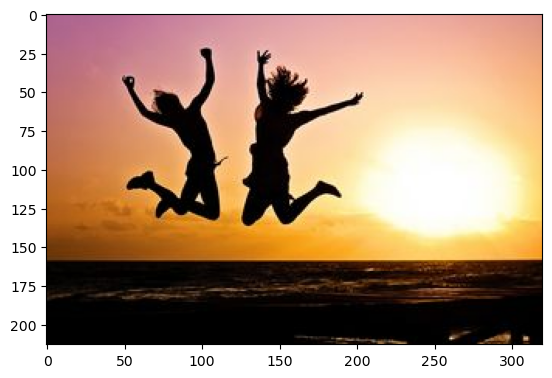

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [13]:
for image in os.listdir(os.path.join(data_dir, 'happy')):
        image_path = os.path.join(data_dir, 'happy', image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list data/happy/.DS_Store


In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [15]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [16]:
import numpy as np

In [17]:
# Building data pipeline
tf.keras.utils.image_dataset_from_directory('data')

Found 300 files belonging to 2 classes.


2024-02-15 12:18:26.578633: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-02-15 12:18:26.578661: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-15 12:18:26.578665: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-15 12:18:26.578703: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-15 12:18:26.578725: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
# Accessing data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 300 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

In [30]:
# Class 0 = Happy People
# Class 1 = Stressed People
batch[1]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

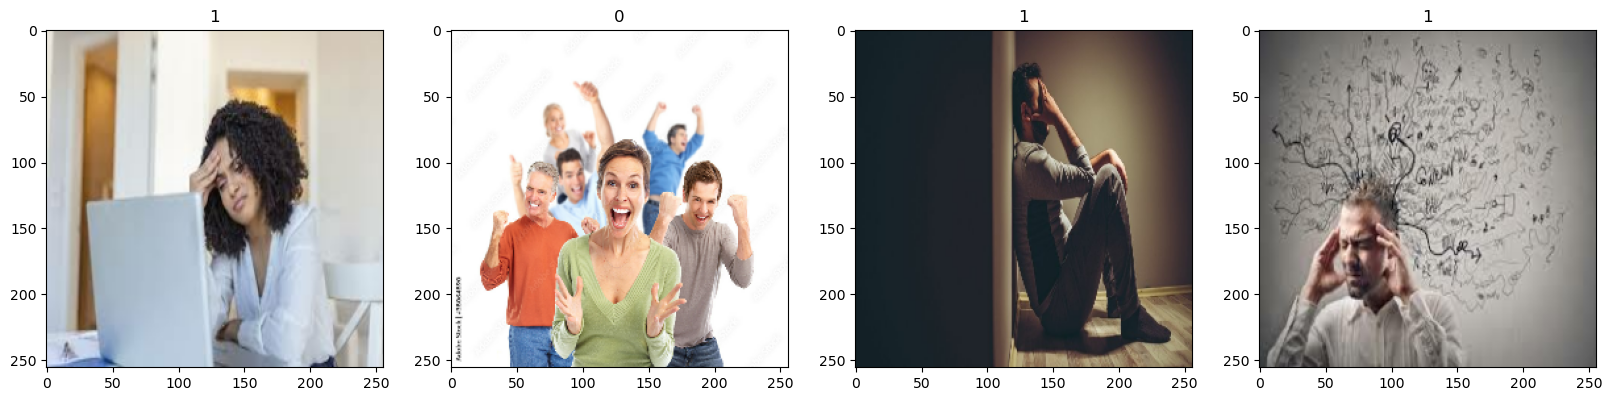

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [40]:
# Preprocessing Data
data = data.map(lambda x, y: (x/255, y))

In [46]:
data.as_numpy_iterator().next()[0].min()

0.0

In [47]:
len(data)

10

In [48]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [52]:
train_size+val_size+test_size

10

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_si ze)
test = data.skip(train_size+val_size).take(test_size)

In [57]:
len(test)

1

In [62]:
# Deep Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [63]:
model = Sequential()

In [64]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [67]:
# Train

logdir='logs'


In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-02-15 14:14:12.717626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 5s 290ms/step - loss: 1.2669 - accuracy: 0.6027 - val_loss: 0.7544 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 3s 250ms/step - loss: 0.5853 - accuracy: 0.7098 - val_loss: 0.5366 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 3s 245ms/step - loss: 0.6070 - accuracy: 0.7054 - val_loss: 0.6056 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 3s 240ms/step - loss: 0.6219 - accuracy: 0.7188 - val_loss: 0.4941 - val_accuracy: 0.7969
Epoch 5/20
7/7 [==============================] - 3s 235ms/step - loss: 0.5236 - accuracy: 0.7768 - val_loss: 0.5553 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 3s 237ms/step - loss: 0.5252 - accuracy: 0.8214 - val_loss: 0.4525 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 3s 243ms/step - loss: 0.4494 - accuracy: 0.7946 - val_loss: 0.3157 - val_accuracy: 0.9062
Epoch 8/20
7/7 [===============

In [72]:
hist

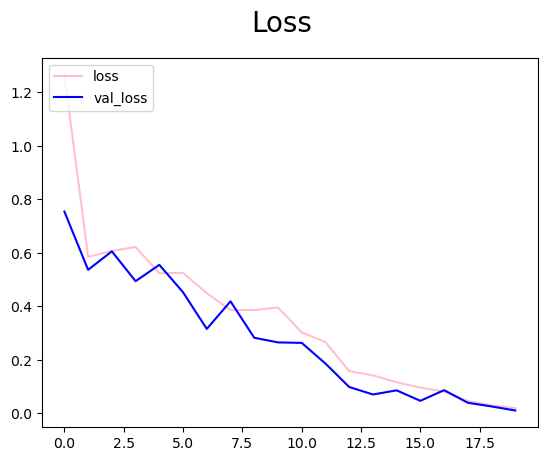

In [74]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='pink', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

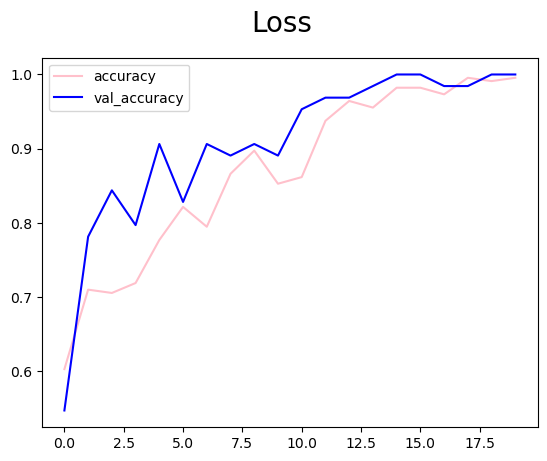

In [75]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='pink', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [76]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
 

In [77]:
precision = Precision()
recall = Recall()
BAccuracy = BinaryAccuracy()

In [80]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_top = model.predict(x)
    precision.update_state(y, y_top)
    recall.update_state(y, y_top)
    BAccuracy.update_state(y, y_top)

1/1 [==============================] - 0s 13ms/step


In [83]:
print(f'Precision: {precision.result().numpy()}, Recall:{recall.result().numpy()}, Acccuracy:{BAccuracy.result().numpy()}')

Precision: 1.0, Recall:1.0, Acccuracy:1.0


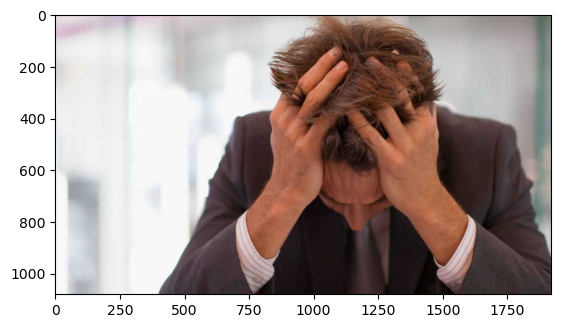

In [128]:
image = cv2.imread('stressed-test.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

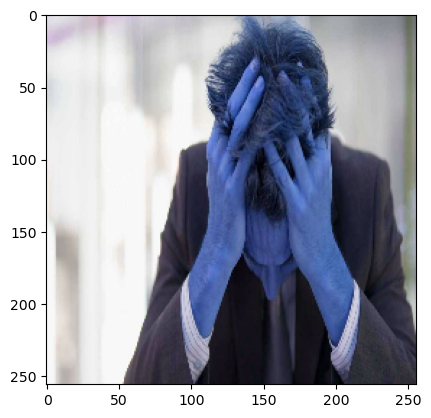

In [129]:
resize = tf.image.resize(image, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[207.93732  , 184.34338  ,  95.70276  ],
        [199.71002  , 175.12445  ,  69.85828  ],
        [205.95312  , 181.03064  ,  82.87561  ],
        ...,
        [192.93872  , 168.9303   ,  57.27466  ],
        [204.45093  , 177.26416  ,  64.745605 ],
        [181.8128   , 153.19568  ,  23.79712  ]],

       [[197.46039  , 169.77289  ,  75.37555  ],
        [202.31921  , 179.76508  ,  80.33484  ],
        [204.10938  , 178.9931   ,  84.99127  ],
        ...,
        [190.91498  , 164.57214  ,  71.611206 ],
        [178.10992  , 154.82251  ,  24.646118 ],
        [146.00818  , 121.874084 ,  10.5078125]],

       [[203.19531  , 178.19531  ,  82.58594  ],
        [191.32904  , 168.4862   ,  59.153015 ],
        [205.00934  , 180.59375  ,  81.8125   ],
        ...,
        [199.9093   , 176.30469  ,  88.83136  ],
        [197.37134  , 169.93842  ,  68.861694 ],
        [188.35815  , 160.54565  ,  30.084412 ]],

       ...,

     

In [117]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [130]:
y_top = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 12ms/step


In [131]:
 y_top

array([[0.7886089]], dtype=float32)

In [133]:
if y_top > 0.5:
    print('Person is stressed')
else:
    print('Person is happy')

Person is stressed


In [134]:
from tensorflow.keras.models import load_model

In [135]:
model.save(os.path.join('models','imageclassifier.h5'))

/Users/ejirougolor/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [137]:
os.path.join('models', 'imageclassifier.h5')

'models/imageclassifier.h5'

In [141]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [142]:
new_model